In [ ]:
%%capture
!pip install tensorflow
!pip install tensorflow_hub
!pip install -q -U "tensorflow-text==2.13.*"
!pip install "tf-models-official==2.13.*"
!pip install gdown
!pip install tensorflow-text --no-dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import gdown
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf
from flask import Flask, request, jsonify
import numpy as np
import os

In [ ]:
# Load the machine learning model
model_recomendation = tf.keras.models.load_model("/content/drive/MyDrive/Scope Of Science Recommendation Model")

Model: "Scope_of_Science_Recommendation_Model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text_input_ei (InputLayer)  [(None,)]                    0         []                            
                                                                                                  
 text_input_sn (InputLayer)  [(None,)]                    0         []                            
                                                                                                  
 text_input_tf (InputLayer)  [(None,)]                    0         []                            
                                                                                                  
 text_input_jp (InputLayer)  [(None,)]                    0         []                            
                                                              

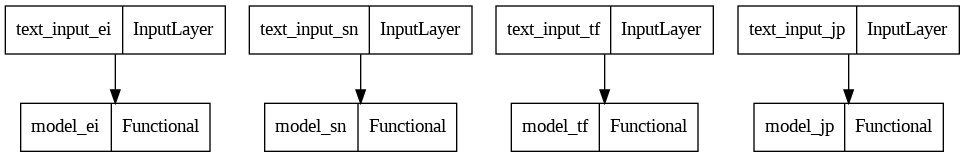

In [ ]:
model_recomendation.summary()
tf.keras.utils.plot_model(model_recomendation)

In [ ]:
import numpy as np
EI_text = np.array(['saya suka menyendiri'])
SN_text = np.array(['saya selalu mengikuti kata hati'])
TF_text = np.array(['saya sangat suka melakukakan analisis ketika memutuskan sesuatu'])
JP_text = np.array(['saya suka beradaptasi dengan situasi baru'])

1/1 [==============================] - 9s 9s/step


[array([[0.11417162]], dtype=float32),
 array([[0.9435409]], dtype=float32),
 array([[0.00161317]], dtype=float32),
 array([[0.34802148]], dtype=float32)]

In [ ]:
numpy_array = [EI_text,SN_text,TF_text,JP_text]
prediction=(model_recomendation.predict(numpy_array))
print(prediction)


1/1 [==============================] - 3s 3s/step
[array([[0.11417162]], dtype=float32), array([[0.9435409]], dtype=float32), array([[0.00161317]], dtype=float32), array([[0.34802148]], dtype=float32)]


In [ ]:
print(prediction[0][0])
print(prediction[1][0])
print(prediction[2][0])
print(prediction[3][0])

array_1 = [float(1-prediction[0][0]), float(prediction[0][0])]
array_2 = [float(1-prediction[1][0]), float(prediction[1][0])]
array_3 = [float(1-prediction[2][0]), float(prediction[2][0])]
array_4 = [float(1-prediction[3][0]), float(prediction[3][0])]

[0.11417162]
[0.9435409]
[0.00161317]
[0.34802148]
[[0.8858283758163452, 0.11417161673307419], [0.056459128856658936, 0.9435408711433411], [0.9983868598937988, 0.0016131687443703413], [0.6519784927368164, 0.3480214774608612]]


In [ ]:
def gabung_probabilitas(arrays):
    num_arrays = len(arrays)
    num_elements = len(arrays[0])

# Inisialisasi array hasil dengan nol
    result_array = [0.0] * num_elements

# Menghitung rata-rata berbobot dari setiap elemen array
    for array in arrays:
        for i in range(num_elements):
            result_array[i] += array[i] / num_arrays

# Menormalisasi hasil sehingga jumlahnya menjadi 1
    total = sum(result_array)
    result_array = [prob / total for prob in result_array]
    percentage_data = [f"{round(element * 100, 2)}%" for element in result_array]
    return percentage_data

# Contoh penggunaan
arrays = [array_1, array_2, array_3, array_4]
hasil_gabungan = gabung_probabilitas(arrays)


print(hasil_gabungan)

['64.82%', '35.18%']


In [ ]:
app = Flask(__name__)
# API endpoint for predictions
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get input data from the request
        data = request.get_json()

        # Extract text inputs
        EI_text = np.array([data['EI_text']])
        SN_text = np.array([data['SN_text']])
        TF_text = np.array([data['TF_text']])
        JP_text = np.array([data['JP_text']])

        # Create a numpy array from the input data
        numpy_array = [EI_text, SN_text, TF_text, JP_text]

        # Make predictions using the loaded model
        predictions = model_recomendation.predict(numpy_array)

        # Convert predictions to a list
        predictions_list = predictions.tolist()

        # Return the predictions as JSON
        return jsonify({'predictions': predictions_list})

    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    # Run the Flask app
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
data_to_send = {'key': 'value'}
response_post = requests.post('http://localhost:5000/api/post', json=data_to_send)
print('POST Response:', response_post.text)